In [3]:
import os
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt

In [14]:
# kaggle.api.authenticate()
# kaggle.api.dataset_download_files('omkargurav/face-mask-dataset',unzip=True)

In [15]:
# Check for GPU 
import tensorflow as tf
print("GPUs Available:", tf.config.list_physical_devices('GPU'))

GPUs Available: []


In [34]:
# Loading files
with_mask = [(os.path.join('data/with_mask', i), "with_mask") for i in os.listdir('data/with_mask')]
without_mask = [(os.path.join('data/without_mask', i), "without_mask") for i in os.listdir('data/without_mask')]
images = random.sample(with_mask+without_mask,6)

# Testing the performance with the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


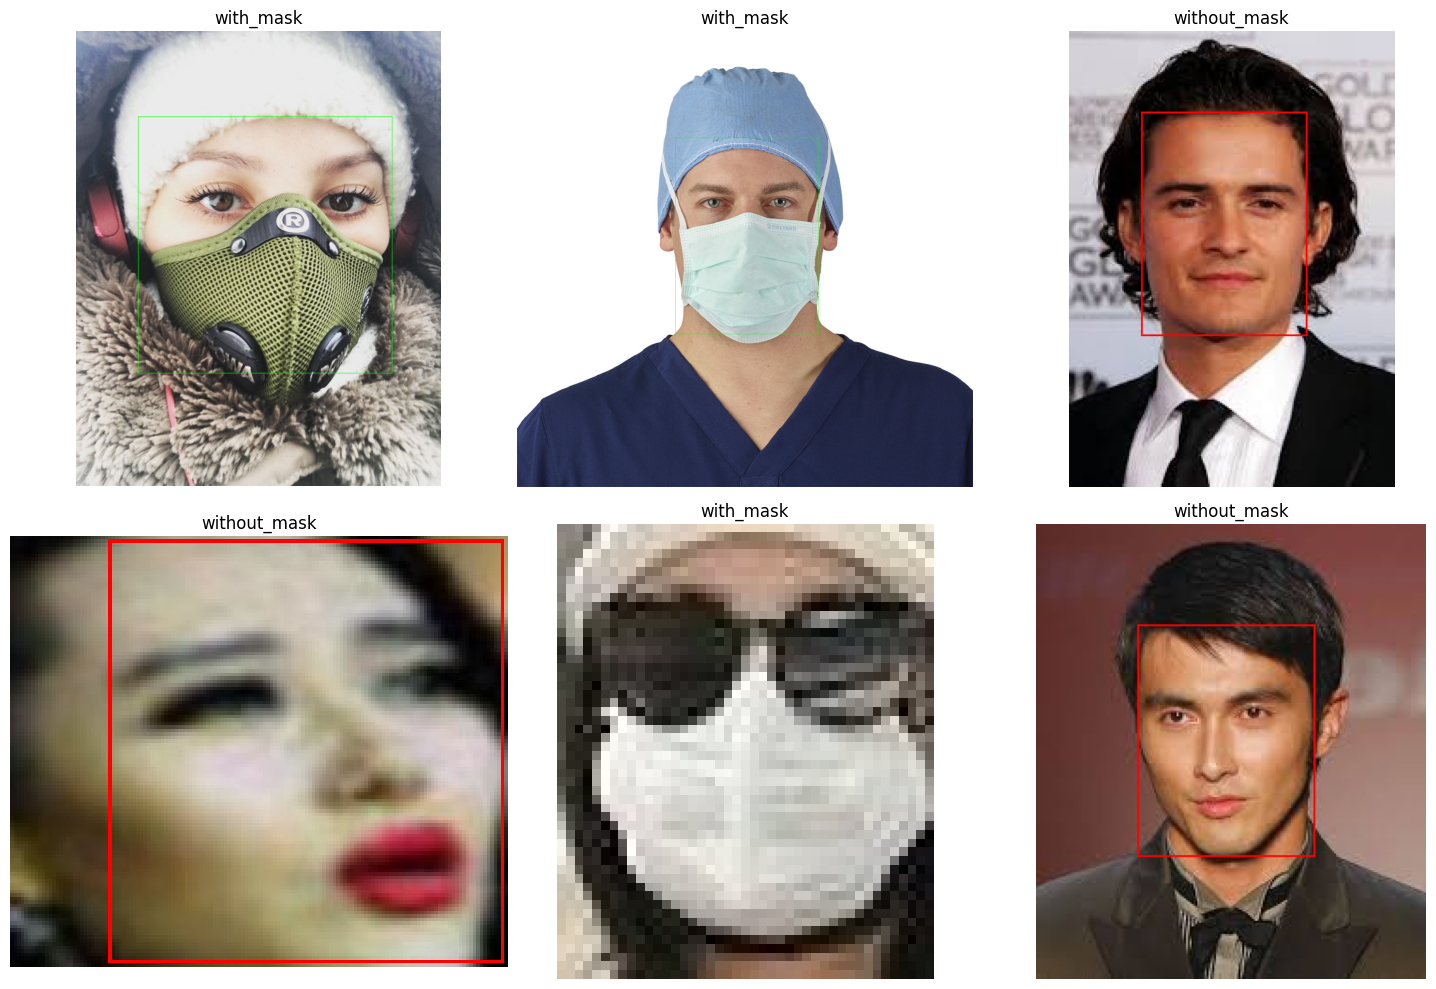

In [35]:
import detect
cols = 3
rows = int(np.ceil(len(images)/cols))

fig,ax = plt.subplots(rows,cols,figsize=(5*cols,5*rows))
ax = ax.flatten()

for i,(img_path,label) in enumerate(images):
    img = cv2.imread(img_path)
    annotated = detect.detect_and_annotate(img)
    img_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img_rgb)
    ax[i].axis('off')
    ax[i].set_title(label)

    for j in range(i+1, len(ax)):
        ax[j].axis('off')
plt.tight_layout()
plt.show()

In [7]:
# The model is predicting correctly

In [ ]:
# To test on image with multiple faces
import detect
image_path = r"assets/test.png"
img = cv2.imread(image_path)
annotated = detect.detect_and_annotate(img)
cv2.namedWindow("Result", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Result", 1000, 800)
cv2.imshow("Result", annotated)

cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
